# Library Imports

In [233]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

These libraries provide functionality for data manipulation (pandas), visualization (matplotlib and seaborn), model training and evaluation (sklearn), and handling imbalanced datasets (imblearn).

# Loading the Dataset

In [236]:
# Load the Dataset
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["ID", "Diagnosis",'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
data = pd.read_csv(file_path, header=None, names=column_names)

The dataset is loaded from a UCI repository URL. The columns include an ID, a diagnosis (M for malignant and B for benign), and 30 feature measurements related to the breast cancer tumors.

# Basic Data Overview

In [239]:
data.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [240]:
data.tail() 

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [241]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [242]:
data.describe()

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [243]:
data.describe().T # Transpose to view in better format

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [244]:
print(f"Shape of dataset: {data.shape}")

Shape of dataset: (569, 32)


Displays the first and last few rows of the dataset, its structure, and summary statistics (mean, standard deviation, etc.) for each feature. The shape provides insights into the number of samples and features.

# Check for duplicate rows

In [247]:
# Check for duplicate rows
num_total_rows = len(data)
num_duplicate_rows = data.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"\nNumber of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")


Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


This block checks for duplicate entries in the dataset and calculates their percentage, which is essential to ensure data quality.

# Unique Value Counts

In [250]:
# Count unique values for each column 
unique_counts = data.nunique()
# Display the unique counts 
print(unique_counts)

ID                         569
Diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave_points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave_points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave_points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

Displays the number of unique values in each column, which helps in understanding the variability of the data.

# Drop non-numeric columns

In [253]:
# Drop non-numeric columns
data.drop('ID', axis=1, inplace=True)

The ID column is removed as it doesn't provide any useful information for the classification task.

# Encode Labels

In [256]:
# Encode Labels: Encoding 'Diagnosis' column (1 for Malignant, 0 for Benign)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

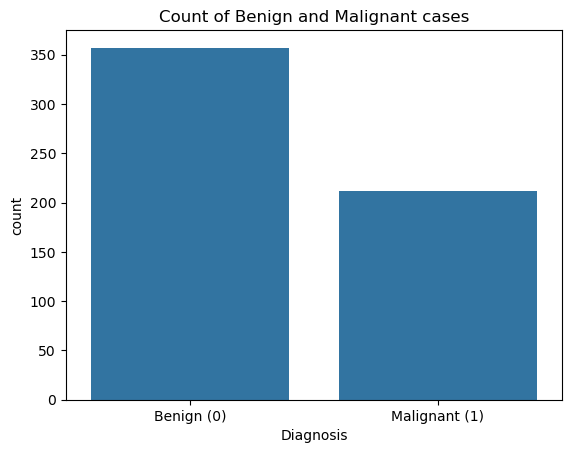

In [257]:
sns.countplot(x='Diagnosis', data=data)
plt.title('Count of Benign and Malignant cases')
plt.xticks(ticks=[0, 1], labels=["Benign (0)", "Malignant (1)"])
plt.show()

The 'Diagnosis' column is encoded to numerical values (1 for malignant, 0 for benign), making it suitable for model training. The count plot visually represents the distribution of cases.

# Pie Chart for Distribution

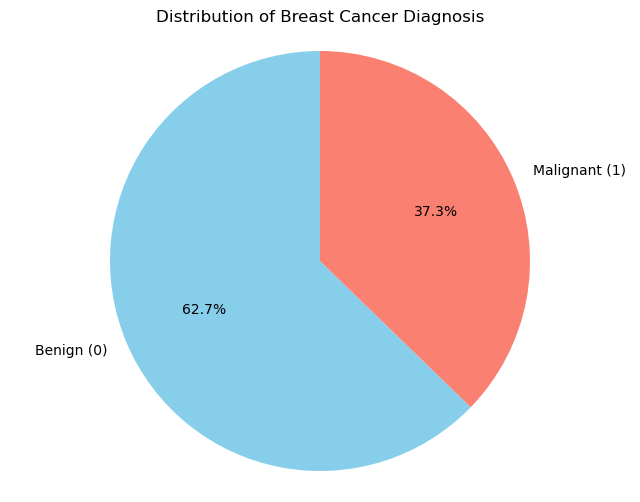

In [260]:
# Create a pie chart for the Distribution of Breast Cancer Diagnosis
diagnosis_counts = data['Diagnosis'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=['Benign (0)', 'Malignant (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Breast Cancer Diagnosis')
plt.axis('equal')
plt.show()

This creates a pie chart to visualize the proportion of benign and malignant cases in the dataset.

# Checking for Missing Values

In [263]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)
# Confirm if there are no missing values
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Some columns have missing values.")


Missing values in each column:
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
No missing values found in the dataset.


This part checks for any missing values in the dataset and prints the count for each column, which is crucial for data integrity.

# Correlation Heatmap

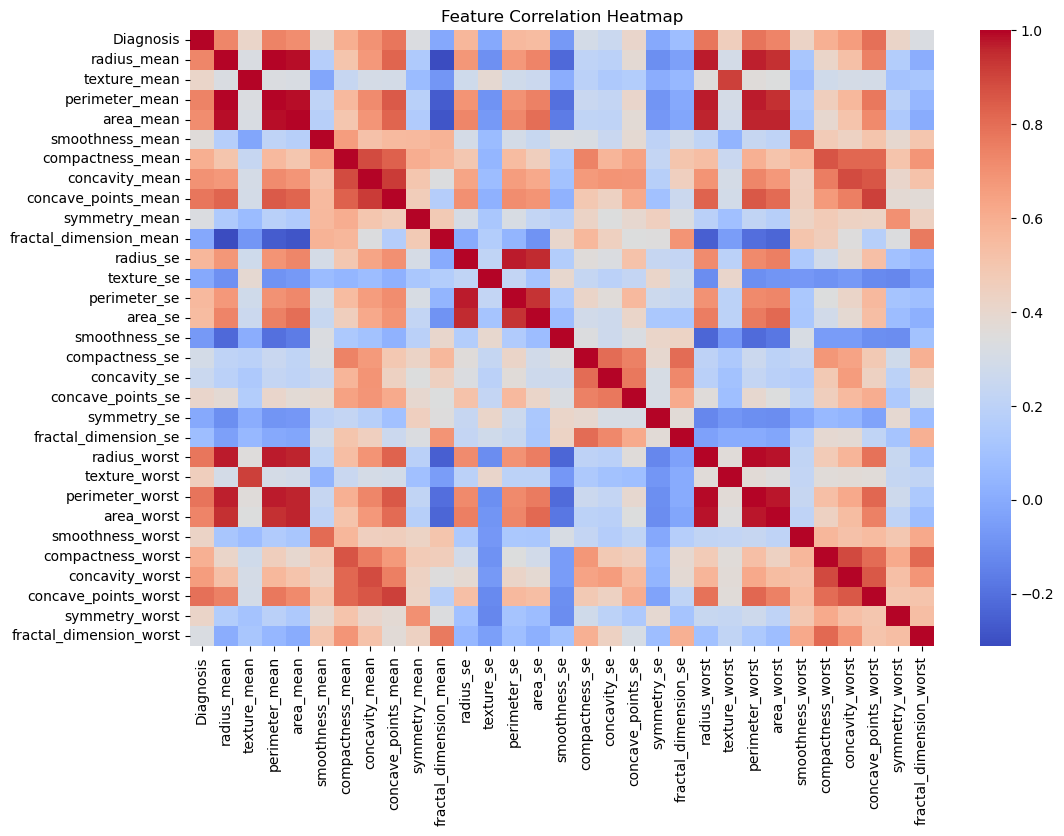

In [266]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

The correlation heatmap visualizes relationships between features. Strong correlations can indicate redundancy or inform feature selection.

# Positive Correlation Scatter Plots

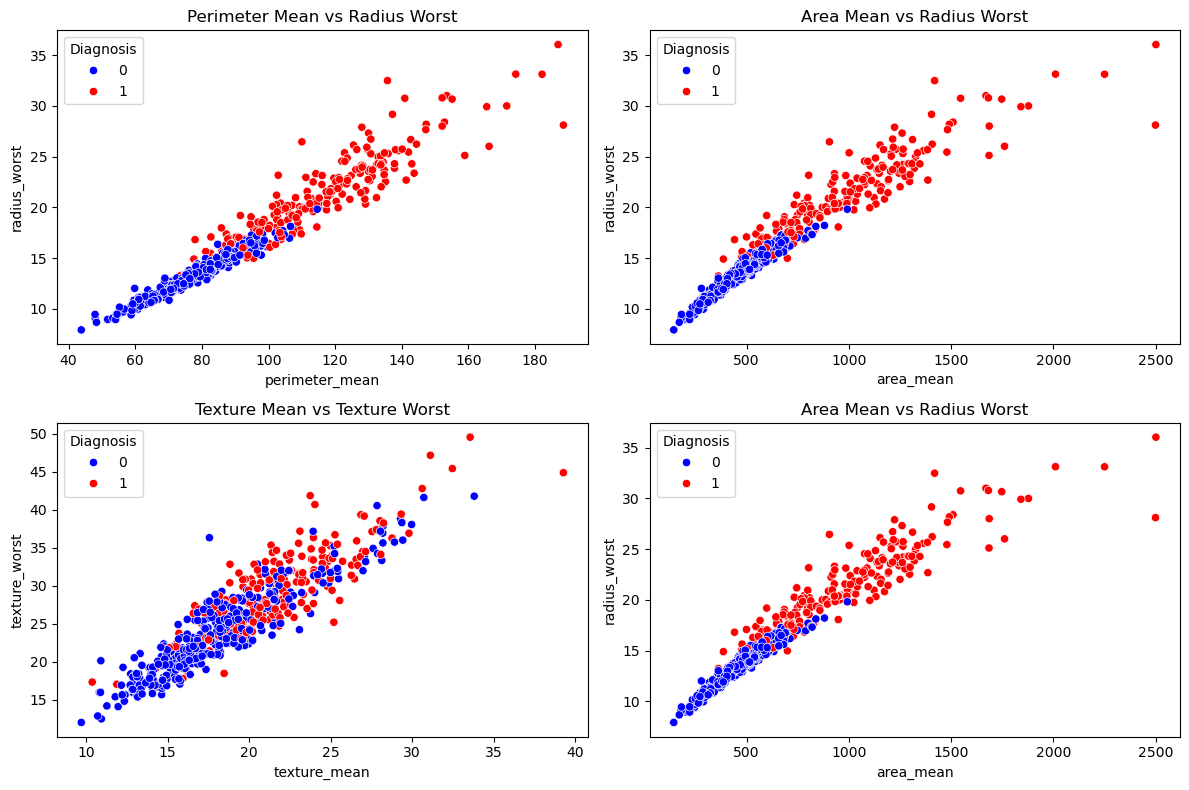

In [269]:
# Plotting positive correlated features
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x=data['perimeter_mean'], y=data['radius_worst'], hue=data['Diagnosis'], palette=['blue', 'red'])
plt.title('Perimeter Mean vs Radius Worst')

plt.subplot(2, 2, 2)
sns.scatterplot(x=data['area_mean'], y=data['radius_worst'], hue=data['Diagnosis'], palette=['blue', 'red'])
plt.title('Area Mean vs Radius Worst')

plt.subplot(2, 2, 3)
sns.scatterplot(x=data['texture_mean'], y=data['texture_worst'], hue=data['Diagnosis'], palette=['blue', 'red'])
plt.title('Texture Mean vs Texture Worst')

plt.subplot(2, 2, 4)
sns.scatterplot(x=data['area_mean'], y=data['radius_worst'], hue=data['Diagnosis'], palette=['blue', 'red'])
plt.title('Area Mean vs Radius Worst')

plt.tight_layout()
plt.show()

Scatter plots explore relationships between selected features and the target variable, revealing patterns that may help in diagnosis.

# Outlier Detection

In [272]:
# Define IQR method for outlier detection
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

# Create a dictionary to store the percentage of outliers for each feature
outliers_percentage = {}

for column in data.columns:
    outlier_count = outliers[column].sum()  # Count of outliers in the feature
    total_count = data[column].shape[0]  # Total number of data points in the feature
    outliers_percentage[column] = (outlier_count / total_count) * 100  # Percentage of outliers

# Print out the outliers percentages
print("\nOutliers percentage detected:")
print(outliers_percentage)



Outliers percentage detected:
{'Diagnosis': 0.0, 'radius_mean': 2.460456942003515, 'texture_mean': 1.2302284710017575, 'perimeter_mean': 2.2847100175746924, 'area_mean': 4.393673110720562, 'smoothness_mean': 1.054481546572935, 'compactness_mean': 2.8119507908611596, 'concavity_mean': 3.163444639718805, 'concave_points_mean': 1.7574692442882252, 'symmetry_mean': 2.6362038664323375, 'fractal_dimension_mean': 2.6362038664323375, 'radius_se': 6.6783831282952555, 'texture_se': 3.5149384885764503, 'perimeter_se': 6.6783831282952555, 'area_se': 11.423550087873462, 'smoothness_se': 5.272407732864675, 'compactness_se': 4.92091388400703, 'concavity_se': 3.8664323374340945, 'concave_points_se': 3.3391915641476277, 'symmetry_se': 4.745166959578207, 'fractal_dimension_se': 4.92091388400703, 'radius_worst': 2.987697715289982, 'texture_worst': 0.8787346221441126, 'perimeter_worst': 2.6362038664323375, 'area_worst': 6.151142355008787, 'smoothness_worst': 1.2302284710017575, 'compactness_worst': 2.811

Calculates the Interquartile Range (IQR) to identify outliers in the data, which can significantly affect model performance.

# Outlier Visualization

In [275]:
# Get the number of outliers for each column
num_outliers_per_column = outliers.sum()

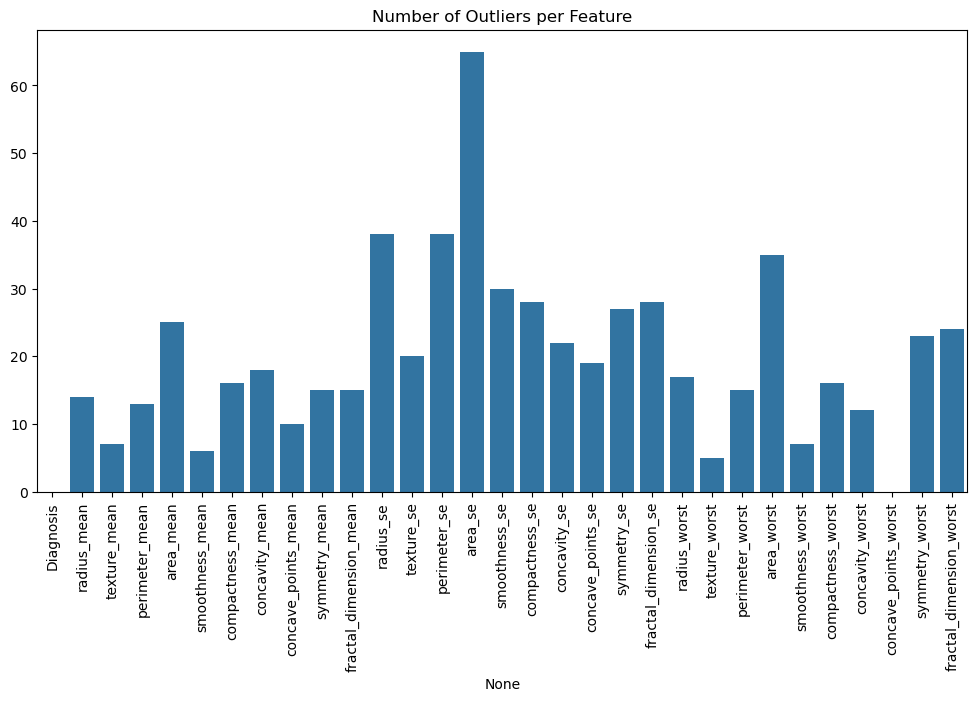

In [276]:
# Visualize the number of outliers per feature
plt.figure(figsize=(12, 6))
sns.barplot(x=num_outliers_per_column.index, y=num_outliers_per_column.values)
plt.xticks(rotation=90)
plt.title("Number of Outliers per Feature")
plt.show()

Displays a bar chart of the number of outliers detected in each feature, aiding in understanding the distribution of values.

# Feature and Label Separation

In [279]:
# Split data into features and labels
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

Separates features (X) from labels (y) for training and testing the model.

# Feature Scaling

In [282]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [283]:
# Display the first few rows of the scaled features
print(pd.DataFrame(X_scaled, columns=X.columns).head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

Standardizes the features to have a mean of 0 and a standard deviation of 1, which improves model performance.

# Data Splitting

In [286]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Splits the dataset into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

# Applying SMOTE

In [289]:
# Applying SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

SMOTE (Synthetic Minority Over-sampling Technique) is applied to the training data to balance the classes, which is critical when dealing with imbalanced datasets.

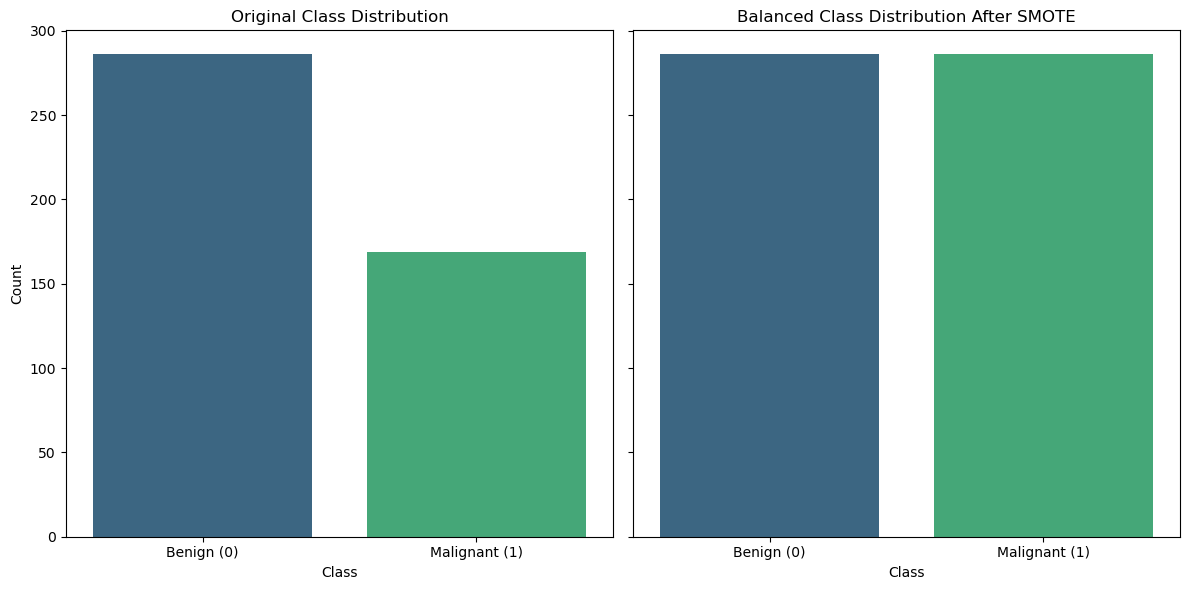

In [367]:
# Visualize the class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot the original class distribution
sns.countplot(x=y_train, ax=axes[0], palette="viridis", hue=y_train)
axes[0].legend_.remove()  # Remove legend
axes[0].set_title("Original Class Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].set_xticks([0, 1])  # Explicitly set ticks
axes[0].set_xticklabels(["Benign (0)", "Malignant (1)"])

# Plot the class distribution after applying SMOTE
sns.countplot(x=y_train_smote, ax=axes[1], palette="viridis", hue=y_train_smote)
axes[1].legend_.remove()  # Remove legend
axes[1].set_title("Balanced Class Distribution After SMOTE")
axes[1].set_xlabel("Class")
axes[1].set_xticks([0, 1])  # Explicitly set ticks
axes[1].set_xticklabels(["Benign (0)", "Malignant (1)"])

plt.tight_layout()
plt.show()


# Initializing AdaBoost Classifier

In [293]:
# Initialize AdaBoost classifier
ada_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Decision stump as weak learner
    n_estimators=50,  # Number of weak learners
    learning_rate=1.0,  # Default learning rate
    algorithm="SAMME",  # Set to SAMME to avoid the FutureWarning
    random_state=42
)

An AdaBoost classifier is initialized, using a decision stump as a weak learner. AdaBoost is an ensemble method that combines weak learners to create a strong classifier.

# Training the Model and Predicting on the Test Set

In [369]:
# Training the model with SMOTE-applied data
ada_classifier.fit(X_train_smote, y_train_smote)

# Predicting on the test set
y_pred_smote = ada_classifier.predict(X_test)

The model is trained on the SMOTE-adjusted training set.

Predictions are made on the test set to evaluate model performance.

# Calculating Performance Metrics

In [374]:
# Calculating performance metrics
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

Computes various performance metrics:
Accuracy: Overall correctness of the model.
Precision: Correct positive predictions out of total positive predictions.
Recall (Sensitivity): Correct positive predictions out of actual positives.
F1 Score: Harmonic mean of precision and recall.
Confusion Matrix: Matrix showing true vs predicted classifications.

# Displaying Evaluation Results


Accuracy: 0.9825

Confusion Matrix:
[[70  1]
 [ 1 42]]


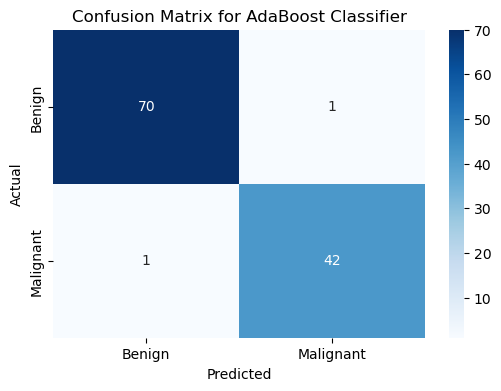


Precision: 0.9767

Recall: 0.9767

F1 Score: 0.9767

Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99        71
   Malignant       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [385]:
# Displaying the evaluation results
print(f"\nAccuracy: {accuracy_smote:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_smote)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

print(f"\nPrecision: {precision_smote:.4f}")
print(f"\nRecall: {recall_smote:.4f}")
print(f"\nF1 Score: {f1_smote:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote, target_names=["Benign", "Malignant"]))

Prints the calculated metrics to assess the model's performance, which is crucial for understanding how well the model is performing.

# Hyperparameter Tuning

In [388]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0, 1.5],
    'estimator__max_depth': [1, 2, 3]
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_smote, y_train_smote)

# Best Parameters and Model
print("\nBest Parameters from Grid Search:")
print(grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters from Grid Search:
{'estimator__max_depth': 2, 'learning_rate': 1.5, 'n_estimators': 150}


Defining the parameter grid for hyperparameter tuning

Grid Search with cross-validation optimizes hyperparameters for the AdaBoost classifier

Hyperparameter tuning using GridSearchCV identified the best parameters:
n_estimators=150 (more weak learners improve performance)
learning_rate=1.5 (adjusts the contribution of weak learners)
estimator__max_depth=2 (a slightly deeper tree captures more complexity).

# Predicting on the Test Set

In [393]:
y_pred_best = best_model.predict(X_test)

Predicting on the Test Set with Best Model

# Calculating Performance Metrics

In [396]:
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

Calculating Performance Metrics for the Best Model

# Displaying Evaluation Results


Accuracy: 0.9825

Confusion Matrix:
[[71  0]
 [ 2 41]]


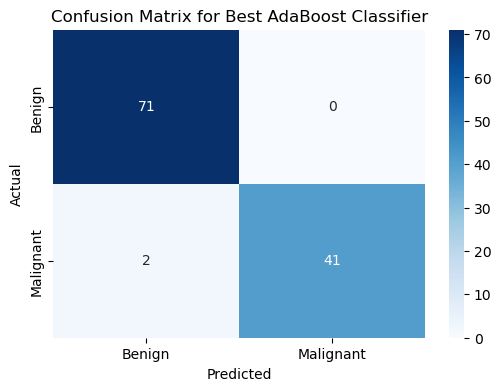


Precision: 1.0000

Recall: 0.9535

F1 Score: 0.9762

Classification Report for Best Model:
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        71
   Malignant       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [399]:
# Displaying the Evaluation Results for the Best Model
print(f"\nAccuracy: {accuracy_best:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_best)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best AdaBoost Classifier')
plt.show()

print(f"\nPrecision: {precision_best:.4f}")
print(f"\nRecall: {recall_best:.4f}")
print(f"\nF1 Score: {f1_best:.4f}")

print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best, target_names=["Benign", "Malignant"]))

The tuned model eliminated false positives but introduced one additional false negative.

# Feature Importances

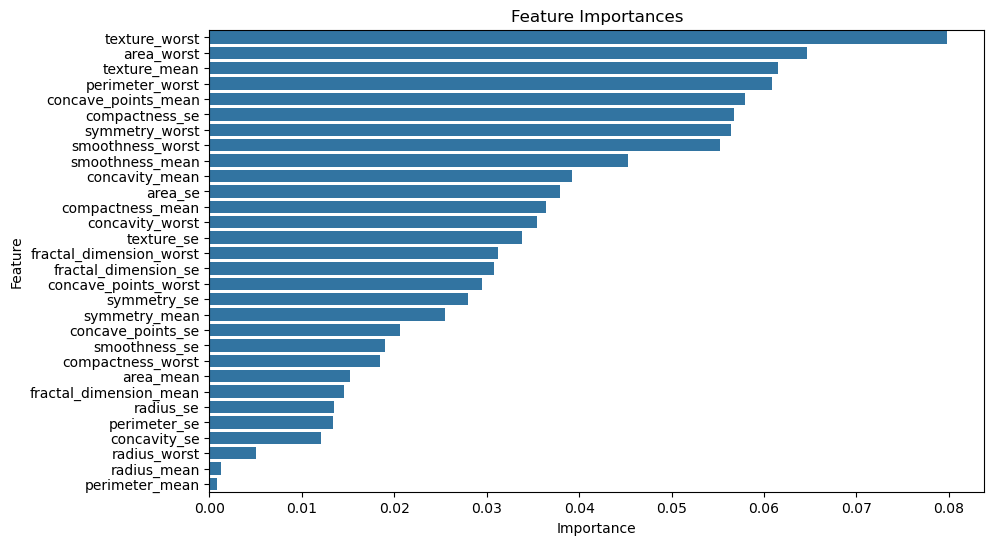


Feature Importances:
                    Feature  Importance
21            texture_worst    0.079847
23               area_worst    0.064669
1              texture_mean    0.061538
22          perimeter_worst    0.060826
7       concave_points_mean    0.057913
15           compactness_se    0.056803
28           symmetry_worst    0.056458
24         smoothness_worst    0.055227
4           smoothness_mean    0.045296
6            concavity_mean    0.039177
13                  area_se    0.037947
5          compactness_mean    0.036434
26          concavity_worst    0.035430
11               texture_se    0.033820
29  fractal_dimension_worst    0.031197
19     fractal_dimension_se    0.030829
27     concave_points_worst    0.029530
18              symmetry_se    0.027950
8             symmetry_mean    0.025487
17        concave_points_se    0.020605
14            smoothness_se    0.018967
25        compactness_worst    0.018438
3                 area_mean    0.015177
9    fractal_dimen

In [410]:
# Extract Feature Importances
feature_importances = best_model.feature_importances_

# Visualize Feature Importances
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

# Show the Results
print("\nFeature Importances:")
print(importance_df) 

# Plotting ROC Curve

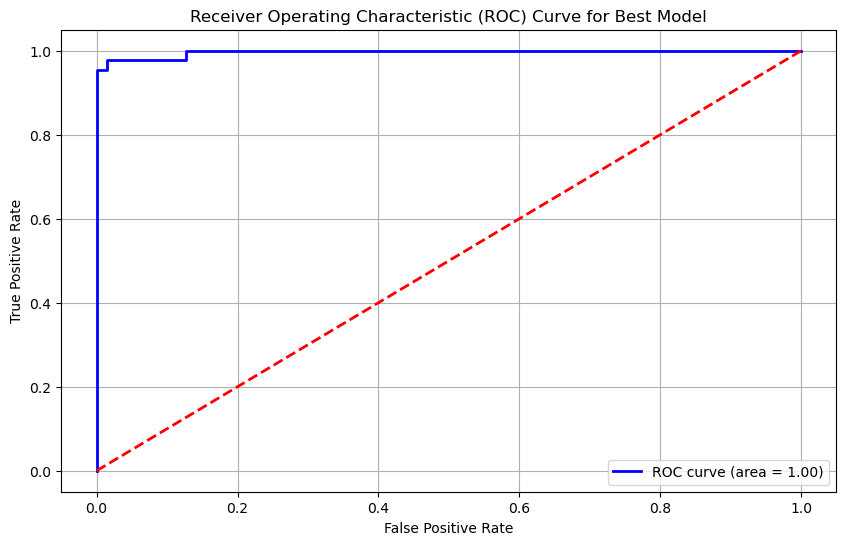

In [405]:
# ROC Curve for the Best Model
# Get predicted probabilities
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
# Calculate ROC curve
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best)
# Calculate the AUC
roc_auc_best = auc(fpr_best, tpr_best)
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_best, tpr_best, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_best))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Model')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Plots the ROC curve to visualize the model's performance across different thresholds, providing insight into its trade-off between sensitivity and specificity.